#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2012





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

 99% 1.71G/1.72G [00:17<00:00, 56.7MB/s]
100% 1.72G/1.72G [00:17<00:00, 108MB/s] 


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2012.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2012.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2012.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2012.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df2 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2012.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df11 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2012.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df2

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,61,159462,Caixa Econômica Federal,1,1,2012,"499,88",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,2
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,64,159462,Caixa Econômica Federal,2,1,2012,"499,88",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,3
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,65,159462,Caixa Econômica Federal,3,1,2012,"499,87",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,4
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,67,159462,Caixa Econômica Federal,4,1,2012,"499,87",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,68,159462,Caixa Econômica Federal,5,1,2012,"499,87",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529705,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,515314,Caixa Econômica Federal,3,1,2012,"543,89",N,2012.0,0.0,100.0,"10294,12",20/06/1980 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,4
2529706,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,515314,Caixa Econômica Federal,1,1,2012,"543,89",N,2012.0,0.0,100.0,"10294,12",20/06/1980 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,4
2529707,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,67,515314,Caixa Econômica Federal,4,1,2012,"543,89",N,2012.0,0.0,100.0,"10294,12",20/06/1980 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,5
2529708,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,68,515314,Caixa Econômica Federal,5,1,2012,"543,89",N,2012.0,0.0,100.0,"10294,12",20/06/1980 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,6


In [ ]:
pd.set_option('display.max_columns', 50)
df11

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,159462,Caixa Econômica Federal,8,2,2012,"499,92",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,9
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,159462,Caixa Econômica Federal,7,2,2012,"499,92",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,9
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,73,159462,Caixa Econômica Federal,9,2,2012,"499,92",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,10
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,75,159462,Caixa Econômica Federal,10,2,2012,"499,92",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,11
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,76,159462,Caixa Econômica Federal,11,2,2012,"499,92",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170655,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,11,2,2012,"753,33",N,2012.0,0.0,100.0,"45751,86",3/02/1988 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1
3170656,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,7,2,2012,"753,33",N,2012.0,0.0,100.0,"45751,86",3/02/1988 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1
3170657,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,9,2,2012,"753,33",N,2012.0,0.0,100.0,"45751,86",3/02/1988 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1
3170658,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,8,2,2012,"753,33",N,2012.0,0.0,100.0,"45751,86",3/02/1988 00:00:00,N,S,Masculino,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2011.1

###Retirando as repetições

In [ ]:
repeticoes = df2['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df2['MESES_CONSEDIDOS'] = df2.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df2

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,61,159462,Caixa Econômica Federal,1,1,2012,"499,88",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,2,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,64,159462,Caixa Econômica Federal,2,1,2012,"499,88",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,3,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,65,159462,Caixa Econômica Federal,3,1,2012,"499,87",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,67,159462,Caixa Econômica Federal,4,1,2012,"499,87",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,68,159462,Caixa Econômica Federal,5,1,2012,"499,87",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529705,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,515314,Caixa Econômica Federal,3,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,4,6
2529706,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,515314,Caixa Econômica Federal,1,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,4,6
2529707,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,67,515314,Caixa Econômica Federal,4,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,5,6
2529708,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,68,515314,Caixa Econômica Federal,5,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,6,6


In [ ]:
df2DuplicateRows = df2[df2.duplicated(subset='CO_CONTRATO_FIES')]
df2DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,64,159462,Caixa Econômica Federal,2,1,2012,"499,88",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,3,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,65,159462,Caixa Econômica Federal,3,1,2012,"499,87",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,67,159462,Caixa Econômica Federal,4,1,2012,"499,87",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,68,159462,Caixa Econômica Federal,5,1,2012,"499,87",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,69,159462,Caixa Econômica Federal,6,1,2012,"499,88",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529705,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,515314,Caixa Econômica Federal,3,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,4,6
2529706,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,515314,Caixa Econômica Federal,1,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,4,6
2529707,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,67,515314,Caixa Econômica Federal,4,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,5,6
2529708,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,68,515314,Caixa Econômica Federal,5,1,2012,"543,89",...,Solteiro,Pardo,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,6,6


In [ ]:
df2ComLinhasDuplicads = df2
df2 = df2.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df2

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,61,159462,Caixa Econômica Federal,1,1,2012,"499,88",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,2,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,62,153701,Caixa Econômica Federal,1,1,2012,"472,55",...,Solteiro,Branco,65.0,7.0,DIREITO,Bacharelado,Anual,2012,3,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,65,323787,Caixa Econômica Federal,2,1,2012,"435,86",...,Solteiro,Branco,100.0,4.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2012,4,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,64,188322,Caixa Econômica Federal,2,1,2012,"363,68",...,Solteiro,Pardo,50.0,7.0,DIREITO,Bacharelado,Anual,2012,3,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,64,157018,Caixa Econômica Federal,2,1,2012,"666,5",...,Solteiro,Branco,100.0,9.0,DIREITO,Bacharelado,Anual,2012,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529680,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,65,507667,Caixa Econômica Federal,1,1,2012,620,...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2012,4,6
2529686,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,62,464837,Caixa Econômica Federal,1,1,2012,"477,25",...,Solteiro,Pardo,100.0,9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,3,6
2529692,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,62,442617,Banco do Brasil,1,1,2012,"345,31",...,Solteiro,Branco,70.0,7.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,3,6
2529698,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,62,465495,Banco do Brasil,1,1,2012,"543,89",...,Solteiro,Negro,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,3,6


In [ ]:
df2ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

393160    30
497071    30
497146    30
393288    30
497101    30
          ..
325934     2
332864     2
336628     2
340204     2
332541     2
Name: CO_CONTRATO_FIES, Length: 392690, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df2.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,392690.000000,392690.000000,392690.000000,392690.000000,392690.000000,392688.000000,392688.000000,392688.000000,392688.000000,392688.000000,392690.0,392690.000000,392690.000000
mean,64.667700,412715.691036,2.738746,1.077685,2011.903097,2011.419730,1.898645,88.834553,88.834553,7.832442,2012.0,4.024139,6.442003
std,2.569141,149977.923596,2.578054,0.267675,0.305557,0.703479,9.554800,18.336829,18.336829,2.228559,0.0,1.412563,1.802622
min,61.000000,111186.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2012.0,2.000000,2.000000
25%,62.000000,298511.250000,1.000000,1.000000,2012.000000,2011.000000,0.000000,75.000000,75.000000,6.000000,2012.0,3.000000,6.000000
50%,65.000000,425911.500000,2.000000,1.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,8.000000,2012.0,4.000000,6.000000
75%,67.000000,538058.750000,3.000000,1.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,10.000000,2012.0,5.000000,6.000000
max,69.000000,649718.000000,12.000000,2.000000,2012.000000,2014.000000,50.000000,100.000000,100.000000,20.000000,2012.0,7.000000,30.000000


In [ ]:
df2.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   84
DS_SEXO                           82
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    82
ST_DEFICIENCIA                    82
DT_NASCIMENTO                     82
DS_RACA_COR                       82
TP_FIANCA                          2
NU_PERCENT_SOLICITADO_FINANC       2
NU_PERCENTUAL_PROUNI               2
NU_ANO_EXERCICIO_INSC              2
VL_REPASSE                         2
QT_SEMESTRE_FINANCIADO             2
DS_CURSO                           2
DS_TIPO_CURSO                      2
DS_PERIODICIDADE_CUR               2
NO_IES                             2
VL_PERC_FINANCIAMENTO              2
NU_ANO_PROC                        0
NU_MES_PROC                        0
SG_UF                              0
NO_MUNICIPIO                       0
VL_MENSALIDADE                     0
NU_ANO                             0
NU_SEMESTRE                        0
NU_MES                             0
NO_AGENTE_FINANCEIRO               0
CO_CONTRATO_FIES                   0
C

In [ ]:
df2.dropna(axis=0, inplace=True)

In [ ]:
df2.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df2.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,392606.000000,392606.000000,392606.000000,392606.000000,392606.000000,392606.000000,392606.000000,392606.000000,392606.000000,392606.000000,392606.0,392606.000000,392606.000000
mean,64.667751,412704.067172,2.738807,1.077694,2011.903083,2011.419660,1.898787,88.833775,88.833775,7.832007,2012.0,4.024146,6.442056
std,2.569140,149982.110650,2.578146,0.267689,0.305577,0.703501,9.555142,18.337143,18.337143,2.228447,0.0,1.412569,1.802757
min,61.000000,111186.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2012.0,2.000000,2.000000
25%,62.000000,298491.250000,1.000000,1.000000,2012.000000,2011.000000,0.000000,75.000000,75.000000,6.000000,2012.0,3.000000,6.000000
50%,65.000000,425895.500000,2.000000,1.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,8.000000,2012.0,4.000000,6.000000
75%,67.000000,538057.750000,3.000000,1.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,10.000000,2012.0,5.000000,6.000000
max,69.000000,649718.000000,12.000000,2.000000,2012.000000,2014.000000,50.000000,100.000000,100.000000,20.000000,2012.0,7.000000,30.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df2['REGIAO'] = df2['SG_UF']

In [ ]:
df2['REGIAO']= df2['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df2['REGIAO']= df2['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df2['REGIAO']= df2['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df2['REGIAO']= df2['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df2['REGIAO']= df2['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df2['CATEGORIA_CIENCIA_CURSO'] = df2['DS_CURSO']

In [ ]:
df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA'
], 
'Ciências Sociais Aplicadas')


df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA'
], 
'Ciências Exatas e da Terra')

df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL'
], 
'Engenharias')

df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS'
], 
'Ciências Agrárias')

df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA'
], 
'Ciências Humanas')

df2['CATEGORIA_CIENCIA_CURSO']= df2['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df2['VL_REPASSE'] = df2['VL_REPASSE'].astype('str')
df2['VL_REPASSE'] = df2['VL_REPASSE'].str.replace(',', '.')
df2['VL_REPASSE']  = pd.to_numeric(df2['VL_REPASSE'], errors='coerce')

df2['VL_MENSALIDADE'] = df2['VL_MENSALIDADE'].astype('str')
df2['VL_MENSALIDADE'] = df2['VL_MENSALIDADE'].str.replace(',', '.')
df2['VL_MENSALIDADE']  = pd.to_numeric(df2['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df2['VALOR_SEMESTRE_PAGO'] = np.where(df2['MESES_CONSEDIDOS'] > 6,
                                           df2['VL_MENSALIDADE'] * 6,
                                           df2['VL_MENSALIDADE'] * df2['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df2['VALOR_ARQUIVO_PAGO'] = df2['VL_MENSALIDADE'] * df2['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df2['MESES_CONSEDIDOS'].value_counts()

6     359724
12     18679
8       9020
18      3565
2       1302
24       286
30        30
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df2['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df2['VL_REPASSE'] - df2['VALOR_ARQUIVO_PAGO']

In [ ]:
df2["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

 0.000000e+00    7826
 4.000000e-02     705
-4.547474e-13     528
 4.547474e-13     523
 2.000000e-02     457
                 ... 
 1.295117e+04       1
 2.903540e+03       1
 4.458356e+04       1
 2.509468e+05       1
 7.030780e+03       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 305063, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2011.2

###Retirando as repetições

In [ ]:
repeticoes = df11['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df11['MESES_CONSEDIDOS'] = df11.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df11

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,159462,Caixa Econômica Federal,8,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,9,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,159462,Caixa Econômica Federal,7,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,9,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,73,159462,Caixa Econômica Federal,9,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,10,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,75,159462,Caixa Econômica Federal,10,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,11,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,76,159462,Caixa Econômica Federal,11,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170655,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,11,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6
3170656,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,7,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6
3170657,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,9,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6
3170658,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,8,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6


In [ ]:
df11DuplicateRows = df11[df11.duplicated(subset='CO_CONTRATO_FIES')]
df11DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,159462,Caixa Econômica Federal,7,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,9,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,73,159462,Caixa Econômica Federal,9,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,10,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,75,159462,Caixa Econômica Federal,10,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,11,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,76,159462,Caixa Econômica Federal,11,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,12,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,78,159462,Caixa Econômica Federal,12,2,2012,"499,95",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2013,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170655,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,11,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6
3170656,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,7,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6
3170657,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,9,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6
3170658,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,78,811179,Caixa Econômica Federal,8,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2013,1,6


In [ ]:
df11ComLinhasDuplicads = df11
df11 = df11.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df11

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,159462,Caixa Econômica Federal,8,2,2012,"499,92",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,9,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,73,153701,Caixa Econômica Federal,7,2,2012,"472,55",...,Solteiro,Branco,65.0,7.0,DIREITO,Bacharelado,Anual,2012,10,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,323787,Caixa Econômica Federal,8,2,2012,"435,86",...,Solteiro,Branco,100.0,4.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2012,9,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,73,188322,Caixa Econômica Federal,8,2,2012,"363,5",...,Solteiro,Pardo,50.0,7.0,DIREITO,Bacharelado,Anual,2012,10,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,72,157018,Caixa Econômica Federal,7,2,2012,"666,56",...,Solteiro,Branco,100.0,9.0,DIREITO,Bacharelado,Anual,2012,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170630,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,73,751698,Banco do Brasil,8,2,2012,"660,86",...,Solteiro,Negro,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,10,6
3170636,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,75,773677,Caixa Econômica Federal,9,2,2012,"660,86",...,Casado,Pardo,100.0,9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,11,6
3170642,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,75,793526,Banco do Brasil,7,2,2012,"753,33",...,Solteiro,Pardo,100.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Semestral,2012,11,6
3170648,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,76,806081,Banco do Brasil,10,2,2012,"701,8",...,Solteiro,Branco,100.0,9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2012,12,6


In [ ]:
df11ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

792773    36
806192    36
807762    36
757803    36
123311    30
          ..
735621     4
708862     4
664078     4
723439     3
643566     3
Name: CO_CONTRATO_FIES, Length: 497368, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df11.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,497368.000000,497368.000000,497368.000000,497368.000000,497368.000000,497367.000000,497367.000000,497367.000000,497367.000000,497367.000000,497368.000000,497368.000000,497368.000000
mean,72.653703,508780.135560,7.531198,1.942359,2011.983708,2011.585662,1.717595,90.057177,90.057177,7.834177,2012.042978,8.889317,6.374877
std,1.851342,197180.449462,1.477820,0.233064,0.139918,0.653001,9.105406,17.569356,17.569356,2.229561,0.202808,2.028666,1.784925
min,71.000000,111185.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2012.000000,1.000000,3.000000
25%,71.000000,349320.750000,7.000000,2.000000,2012.000000,2011.000000,0.000000,80.000000,80.000000,6.000000,2012.000000,8.000000,6.000000
50%,72.000000,526020.000000,7.000000,2.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,8.000000,2012.000000,9.000000,6.000000
75%,73.000000,681160.250000,8.000000,2.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,10.000000,2012.000000,10.000000,6.000000
max,78.000000,823245.000000,12.000000,2.000000,2012.000000,2013.000000,50.000000,100.000000,100.000000,25.000000,2013.000000,12.000000,36.000000


In [ ]:
df11.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   256
DS_SEXO                           253
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    253
ST_DEFICIENCIA                    253
DT_NASCIMENTO                     253
DS_RACA_COR                       253
DS_PERIODICIDADE_CUR                2
DS_TIPO_CURSO                       2
DS_CURSO                            2
NU_PERCENTUAL_PROUNI                1
NU_PERCENT_SOLICITADO_FINANC        1
VL_REPASSE                          1
NU_ANO_EXERCICIO_INSC               1
TP_FIANCA                           1
QT_SEMESTRE_FINANCIADO              1
NO_IES                              1
VL_PERC_FINANCIAMENTO               1
NU_ANO_PROC                         0
NU_MES_PROC                         0
SG_UF                               0
NO_MUNICIPIO                        0
VL_MENSALIDADE                      0
NU_ANO                              0
NU_SEMESTRE                         0
NU_MES                              0
NO_AGENTE_FINANCEIRO                0
CO_CONTRATO_

In [ ]:
df11.dropna(axis=0, inplace=True)

In [ ]:
df11.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df11.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000,497111.000000
mean,72.653757,508703.412505,7.531115,1.942335,2011.983702,2011.585487,1.718178,90.055527,90.055527,7.833168,2012.042988,8.889226,6.375011
std,1.851427,197177.226707,1.477970,0.233109,0.139947,0.653090,9.106895,17.570529,17.570529,2.229455,0.202831,2.028823,1.785277
min,71.000000,111185.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2012.000000,1.000000,3.000000
25%,71.000000,349249.000000,7.000000,2.000000,2012.000000,2011.000000,0.000000,80.000000,80.000000,6.000000,2012.000000,8.000000,6.000000
50%,72.000000,525916.000000,7.000000,2.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,8.000000,2012.000000,9.000000,6.000000
75%,73.000000,681071.500000,8.000000,2.000000,2012.000000,2012.000000,0.000000,100.000000,100.000000,10.000000,2012.000000,10.000000,6.000000
max,78.000000,823245.000000,12.000000,2.000000,2012.000000,2013.000000,50.000000,100.000000,100.000000,25.000000,2013.000000,12.000000,36.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df11['REGIAO'] = df11['SG_UF']

In [ ]:
df11['REGIAO']= df11['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df11['REGIAO']= df11['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df11['REGIAO']= df11['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df11['REGIAO']= df11['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df11['REGIAO']= df11['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df11['CATEGORIA_CIENCIA_CURSO'] = df11['DS_CURSO']

In [ ]:
df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA'
], 
'Ciências Sociais Aplicadas')


df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA'
], 
'Ciências Exatas e da Terra')

df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL'
], 
'Engenharias')

df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS'
], 
'Ciências Agrárias')

df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA'
], 
'Ciências Humanas')

df11['CATEGORIA_CIENCIA_CURSO']= df11['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df11['VL_REPASSE'] = df11['VL_REPASSE'].astype('str')
df11['VL_REPASSE'] = df11['VL_REPASSE'].str.replace(',', '.')
df11['VL_REPASSE']  = pd.to_numeric(df11['VL_REPASSE'], errors='coerce')

df11['VL_MENSALIDADE'] = df11['VL_MENSALIDADE'].astype('str')
df11['VL_MENSALIDADE'] = df11['VL_MENSALIDADE'].str.replace(',', '.')
df11['VL_MENSALIDADE']  = pd.to_numeric(df11['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df11['VALOR_SEMESTRE_PAGO'] = np.where(df11['MESES_CONSEDIDOS'] > 6,
                                           df11['VL_MENSALIDADE'] * 6,
                                           df11['VL_MENSALIDADE'] * df11['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df11['VALOR_ARQUIVO_PAGO'] = df11['VL_MENSALIDADE'] * df11['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df11['MESES_CONSEDIDOS'].value_counts()

6     469273
12     22504
18      2493
4       1514
24       957
30       284
10        74
16         4
36         4
3          2
22         1
8          1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df11['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df11['VL_REPASSE'] - df11['VALOR_ARQUIVO_PAGO']

In [ ]:
df11["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

 0.000000e+00    4511
 4.000000e-02     678
-9.094947e-13     506
 4.547474e-13     313
-4.547474e-13     309
                 ... 
 3.125061e+04       1
 2.069287e+04       1
 2.497594e+04       1
 3.124559e+04       1
 4.123176e+04       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 387310, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2012.1

##Analisando os valores por estado.

In [ ]:
df2.SG_UF.value_counts()

SP    124697
MG     52581
PR     25024
RS     24375
RJ     22761
BA     21695
MT     19167
CE     13210
SC     10452
GO      9365
PE      9351
PB      7806
DF      7559
RN      6792
ES      6068
PI      5719
SE      3673
MS      3380
MA      3255
PA      3084
AC      2976
AL      2784
AP      1835
RO      1665
AM      1537
TO      1146
RR       649
Name: SG_UF, dtype: int64

In [ ]:
df2_estados_interativo = df2.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df2_estados_interativo.index,
               y=df2_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df2.REGIAO.value_counts()

SUDESTE         206107
NORDESTE         74285
SUL              59851
CENTRO-OESTE     39471
NORTE            12892
Name: REGIAO, dtype: int64

In [ ]:
df2_regiao_interativo = df2.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_regiao_interativo.index,
               y=df2_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 330)
df2.DS_CURSO.value_counts()

DIREITO                                                       63820
ENFERMAGEM                                                    31883
ADMINISTRAÇÃO                                                 30566
ENGENHARIA CIVIL                                              24647
PSICOLOGIA                                                    16930
                                                              ...  
GESTÃO DE MICRO E PEQUENAS EMPRESAS                               1
RADIOLOGIA MÉDICA                                                 1
ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS        1
ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR                                1
CONSERVAÇÃO E RESTAURO                                            1
Name: DS_CURSO, Length: 330, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df2_curso_interativo = df2.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df2_curso_interativo.index,
               y=df2_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df2.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     147480
Ciências da Saúde              105826
Engenharias                     66198
Ciências Humanas                34958
Ciências Exatas e da Terra      16448
Ciências Agrárias                9969
Linguística, Letras e Artes      6584
Ciências Biológicas              5143
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

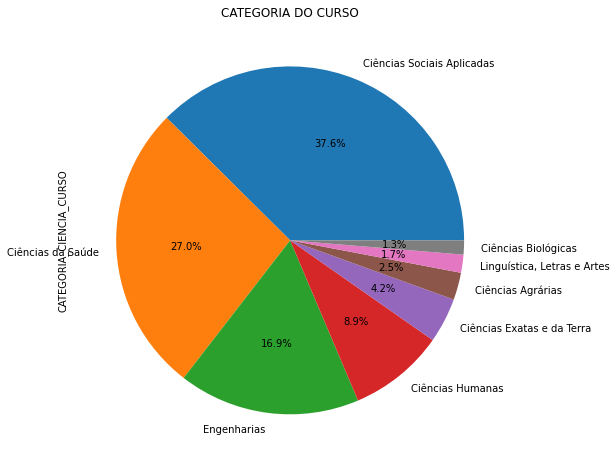

In [ ]:
plot = df2['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df2.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    284107
N     77641
P     30858
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

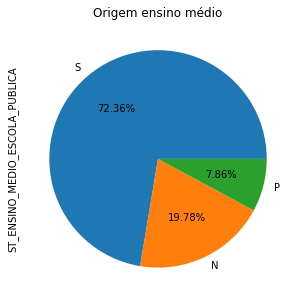

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df2['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df2['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df2.DS_SEXO.value_counts()

Feminino     229632
Masculino    162974
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

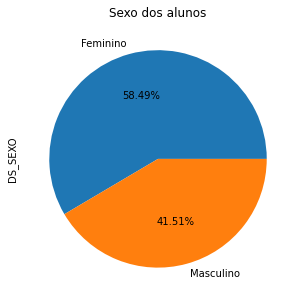

In [ ]:
plot = df2['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1305)
df2.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                        11862
UNIVERSIDADE ESTÁCIO DE SÁ                                    8787
UNIVERSIDADE DE CUIABÁ                                        8252
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS              5558
Centro Universitário Estácio do Ceará                         4880
                                                             ...  
FACULDADE DE TECNOLOGIA ASSESSORITEC                             1
FACULDADE CENECISTA DE RIO BONITO                                1
FACULDADE DE TECNOLOGIA DA SERRA GAÚCHA - BENTO CONÇALVES        1
CENTRO DE ENSINO SUPERIOR DE UBERABA                             1
Faculdade Presidente Antônio Carlos de Raul Soares               1
Name: NO_IES, Length: 1305, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 415)
df2.NO_MUNICIPIO.value_counts()

São Paulo          47872
Valinhos           38660
Belo Horizonte     33358
Rio de Janeiro     18841
Salvador           11759
                   ...  
Monte Santo            2
Ribeirão Pires         2
Bento Gonçalves        1
Paranaguá              1
Itapuranga             1
Name: NO_MUNICIPIO, Length: 415, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df2.ST_DEFICIENCIA.value_counts()

N    390352
S      2254
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

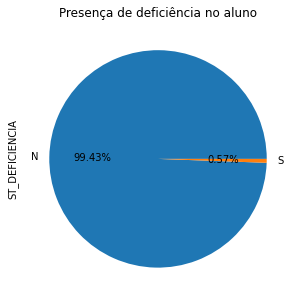

In [ ]:
plot = df2['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df2.DS_RACA_COR.value_counts()

Branco     209040
Pardo      135306
Negro       38341
Amarelo      9075
Índio         844
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

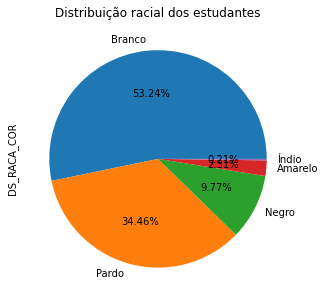

In [ ]:
plot = df2['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df2.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    243024
Banco do Brasil            149582
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

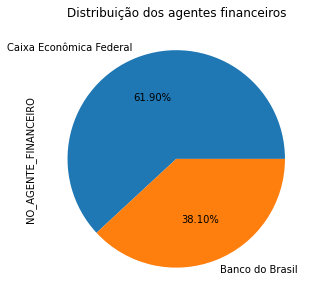

In [ ]:
plot = df2['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df2.DS_ESTADO_CIVIL.value_counts()

Solteiro         311079
Casado            56064
União estável     11768
Divorciado         8468
Separado           4547
Viúvo               680
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

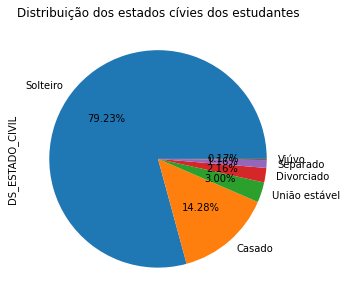

In [ ]:
plot = df2['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df2.DS_PERIODICIDADE_CUR.value_counts()

Semestral     376928
Anual          15470
Trimestral       208
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

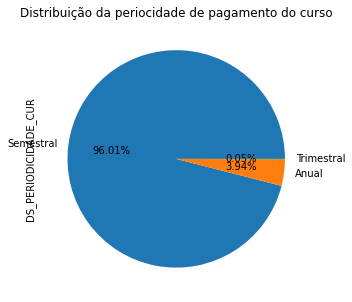

In [ ]:
plot = df2['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df2.NU_ANO_PROC.value_counts()

2012    392606
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df2ComLinhasDuplicads.NU_MES_PROC.value_counts()

7    560469
5    558330
4    502892
6    502773
3    294008
2    111238
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

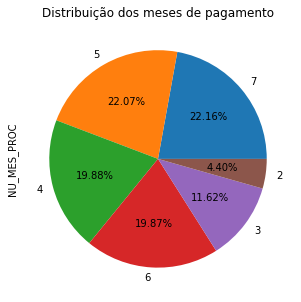

In [ ]:
plot = df2ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df2ComLinhasDuplicads.NU_MES.value_counts()

1     388450
2     388450
3     388450
4     388450
5     388450
6     388450
12     50375
11     29727
9      29727
7      29727
8      29727
10     29727
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

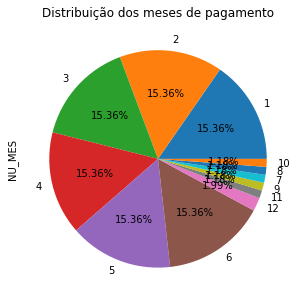

In [ ]:
plot = df2ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df2.NU_SEMESTRE.value_counts()

1    362103
2     30503
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

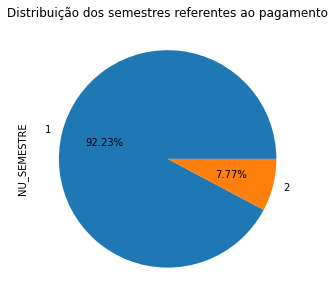

In [ ]:
plot = df2['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df2ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    2330700
2     199010
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

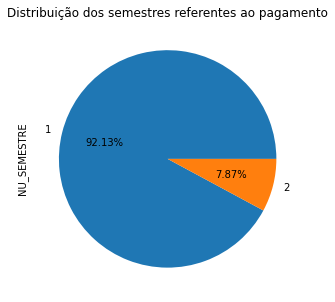

In [ ]:
plot = df2ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df2ComLinhasDuplicads.NU_ANO.value_counts()

2012    2284254
2011     237308
2010       8148
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

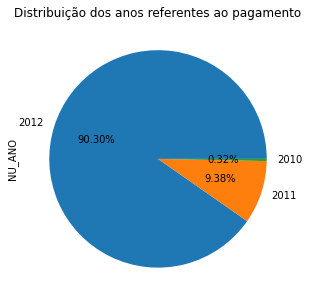

In [ ]:
plot = df2ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df2.TP_FIANCA.value_counts()

N    231021
F    152195
S      9390
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

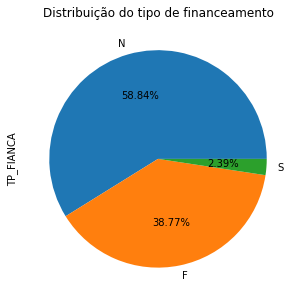

In [ ]:
plot = df2['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df2.DS_TIPO_CURSO.value_counts()

Bacharelado     334563
Licenciatura     34936
Tecnológico      23104
Sequencial           3
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

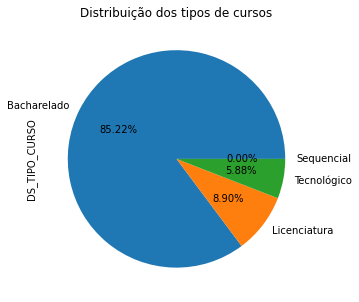

In [ ]:
plot = df2['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df2.CO_PROCESSO.value_counts()

65    105643
62     81558
67     65771
61     52409
68     31731
69     30529
64     24943
63        21
66         1
Name: CO_PROCESSO, dtype: int64

In [ ]:
df2.NU_ANO_EXERCICIO_INSC.value_counts()

2012.0    214099
2011.0    129165
2010.0     49341
2014.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df2.NU_PERCENTUAL_PROUNI.value_counts()

0.0     377686
50.0     14899
25.0        21
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df2.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    272931
50.0      52294
75.0      34265
70.0       9961
60.0       7115
80.0       7091
90.0       2748
85.0       2146
65.0       1997
55.0       1185
95.0        870
51.0          1
71.0          1
66.0          1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df2.VL_REPASSE.value_counts()

37928.24    215
18768.60    177
41380.66    150
17126.45    142
16580.55    131
           ... 
15224.96      1
6345.58       1
29834.28      1
25499.95      1
49267.35      1
Name: VL_REPASSE, Length: 305988, dtype: int64

In [ ]:
df2.VL_PERC_FINANCIAMENTO.value_counts()

100.0    272931
50.0      52294
75.0      34265
70.0       9961
60.0       7115
80.0       7091
90.0       2748
85.0       2146
65.0       1997
55.0       1185
95.0        870
51.0          1
71.0          1
66.0          1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df2.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    115686
8.0      93560
6.0      40853
7.0      33169
9.0      33153
4.0      26434
5.0      21932
3.0       9521
12.0      7598
2.0       5943
11.0      3929
1.0        616
13.0        99
14.0        43
15.0        33
16.0        24
20.0         8
18.0         2
19.0         2
17.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df2.VL_REPASSE.sum()

13599370814.69

In [ ]:
df2.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   3996238613.610
MG   1937441425.690
RS   1037496822.520
PR    890722487.400
RJ    794558554.610
BA    678008600.640
MT    663183468.710
CE    529537512.500
SC    433346471.260
GO    360423033.370
PB    295856644.300
ES    275680975.600
PE    243343426.160
DF    239866146.940
PI    211529169.840
RN    174283401.640
PA    122000338.640
SE    113935942.700
AC    100468171.310
RO     94981638.010
MS     75210651.150
MA     74093158.510
AM     66906437.540
AL     60306413.960
TO     59422183.710
AP     56055892.020
RR     14473232.350
Name: VL_REPASSE, dtype: float64

In [ ]:
df2_vl_estados_interativo = df2.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df2_vl_estados_interativo.index,
               y=df2_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df2.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        7003919569.510
NORDESTE       2380894270.250
SUL            2361565781.180
CENTRO-OESTE   1338683300.170
NORTE           514307893.580
Name: VL_REPASSE, dtype: float64

In [ ]:
df2_vl_regiao_interativo = df2.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_vl_regiao_interativo.index,
               y=df2_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df2.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             5809580654.860
Ciências Sociais Aplicadas    3729689681.150
Engenharias                   2204933326.230
Ciências Humanas               886550623.630
Ciências Agrárias              437464787.770
Ciências Exatas e da Terra     298044604.490
Linguística, Letras e Artes    141004131.100
Ciências Biológicas             92103005.460
Name: VL_REPASSE, dtype: float64

In [ ]:
df2_vl_regiao_interativo = df2.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_vl_regiao_interativo.index,
               y=df2_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df2.VALOR_SEMESTRE_PAGO.sum()

1637059660.0400002

In [ ]:
df2.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   501088739.940
MG   229323568.100
RS   113973467.900
PR   106438766.980
RJ   101505422.640
MT    86518062.460
BA    79467319.520
CE    55952874.900
SC    49358106.340
GO    40728174.520
PB    33873961.060
PE    31689010.820
ES    29749376.400
DF    29268635.240
PI    22596475.240
RN    22215325.600
SE    14164676.320
PA    13934820.380
AC    12470905.600
MS    11186559.820
RO    10222005.060
MA     9657665.740
AM     7917221.860
AL     7818078.420
AP     7246649.100
TO     6747610.200
RR     1946179.880
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df2_vl_estados_interativo = df2.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df2_vl_estados_interativo.index,
               y=df2_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df2.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        861667107.080
NORDESTE       277435387.620
SUL            269770341.220
CENTRO-OESTE   167701432.040
NORTE           60485392.080
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df2_vl_regiao_interativo = df2.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_vl_regiao_interativo.index,
               y=df2_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df2.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             629233208.300
Ciências Sociais Aplicadas    488930135.700
Engenharias                   266490037.700
Ciências Humanas              113039107.500
Ciências Agrárias              51582998.720
Ciências Exatas e da Terra     50467767.480
Linguística, Letras e Artes    22689910.160
Ciências Biológicas            14626494.480
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df2_vl_regiao_interativo = df2.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_vl_regiao_interativo.index,
               y=df2_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df2.VALOR_ARQUIVO_PAGO.sum()

1746356350.1400003

In [ ]:
df2.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   525969729.740
MG   246090251.920
RS   122761816.880
PR   112260688.140
RJ   108430930.180
MT    96246351.660
BA    86559197.600
CE    60329813.640
SC    52190379.820
GO    42363296.760
PB    37768020.120
PE    33501474.720
ES    31329646.280
DF    30428076.680
RN    25353182.520
PI    24895611.200
SE    15249112.200
PA    15025217.520
AC    12957788.760
MS    11874926.140
RO    11153498.240
MA     9974901.120
AL     8629660.440
AM     8359431.600
TO     7316386.260
AP     7298938.100
RR     2038021.900
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df2_vl_estados_interativo = df2.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df2_vl_estados_interativo.index,
               y=df2_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df2.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        7003919569.510
NORDESTE       2380894270.250
SUL            2361565781.180
CENTRO-OESTE   1338683300.170
NORTE           514307893.580
Name: VL_REPASSE, dtype: float64

In [ ]:
df2_vl_regiao_interativo = df2.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_vl_regiao_interativo.index,
               y=df2_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df2.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             678943659.000
Ciências Sociais Aplicadas    519223121.320
Engenharias                   281436864.280
Ciências Humanas              119075215.320
Ciências Agrárias              54819168.380
Ciências Exatas e da Terra     53687760.440
Linguística, Letras e Artes    23730852.060
Ciências Biológicas            15439709.340
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df2_vl_regiao_interativo = df2.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df2_vl_regiao_interativo.index,
               y=df2_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2012.2

##Analisando os valores por estado.

In [ ]:
df11.SG_UF.value_counts()

SP    165534
MG     65744
RJ     31829
BA     29265
PR     28145
RS     27255
MT     21671
CE     17039
GO     12619
SC     12614
PE     12065
DF     11596
PB      9312
ES      7040
PI      6572
RN      6119
MA      5005
SE      4322
PA      4028
AC      3711
MS      3532
AL      2680
AP      2648
RO      2116
AM      1836
TO      1528
RR      1286
Name: SG_UF, dtype: int64

In [ ]:
df11_estados_interativo = df11.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df11_estados_interativo.index,
               y=df11_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df11.REGIAO.value_counts()

SUDESTE         270147
NORDESTE         92379
SUL              68014
CENTRO-OESTE     49418
NORTE            17153
Name: REGIAO, dtype: int64

In [ ]:
df11_regiao_interativo = df11.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_regiao_interativo.index,
               y=df11_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 336)
df11.DS_CURSO.value_counts()

DIREITO                                                       79088
ADMINISTRAÇÃO                                                 41956
ENFERMAGEM                                                    39694
ENGENHARIA CIVIL                                              31896
PEDAGOGIA                                                     22487
                                                              ...  
QUÍMICA DE ALIMENTOS                                              1
ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS        1
EDUCAÇÃO NAS ORGANIZAÇÕES                                         1
CIÊNCIAS POLÍTICAS                                                1
QUÍMICA AMBIENTAL                                                 1
Name: DS_CURSO, Length: 336, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df11_curso_interativo = df11.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df11_curso_interativo.index,
               y=df11_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df11.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     190534
Ciências da Saúde              128880
Engenharias                     84686
Ciências Humanas                46269
Ciências Exatas e da Terra      20354
Ciências Agrárias               11748
Linguística, Letras e Artes      8636
Ciências Biológicas              6004
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

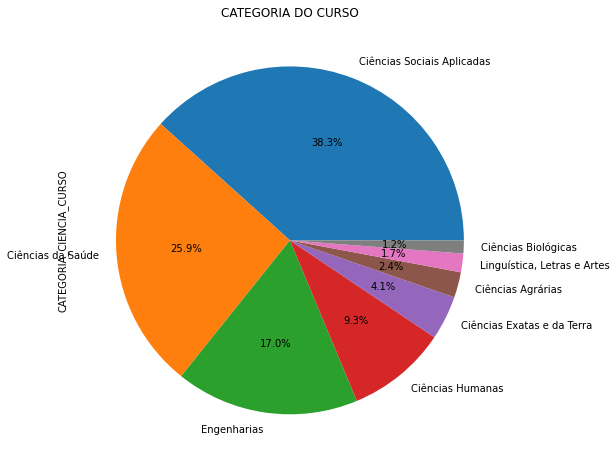

In [ ]:
plot = df11['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df11.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    365724
N     94247
P     37140
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

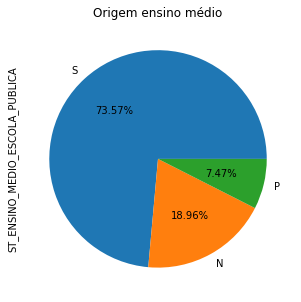

In [ ]:
plot = df11['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df11.DS_SEXO.value_counts()

Feminino     293440
Masculino    203671
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

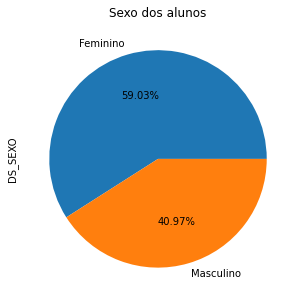

In [ ]:
plot = df11['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1138)
df11.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                14153
UNIVERSIDADE ESTÁCIO DE SÁ                           12916
UNIVERSIDADE DE CUIABÁ                                9081
Centro Universitário Estácio do Ceará                 7187
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS      6368
                                                     ...  
FACULDADE DE EDUCAÇÃO DE NOVA ANDRADINA                  1
FACULDADE DE TECNOLOGIA SENAC SÃO MIGUEL DO OESTE        1
FACULDADE DE TECNOLOGIA SENAC BLUMENAU                   1
FACULDADE DE TECNOLOGIA SENAI JARAGUÁ DO SUL             1
Faculdades Unificadas de Guarapari                       1
Name: NO_IES, Length: 1380, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 440)
df11.NO_MUNICIPIO.value_counts()

São Paulo           64826
Valinhos            51415
Belo Horizonte      43477
Rio de Janeiro      25262
Salvador            16725
                    ...  
Amambai                 2
Paranaguá               1
Paraíso do Norte        1
São Gotardo             1
Guanhães                1
Name: NO_MUNICIPIO, Length: 440, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df11.ST_DEFICIENCIA.value_counts()

N    494322
S      2789
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

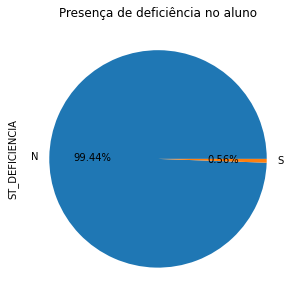

In [ ]:
plot = df11['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df11.DS_RACA_COR.value_counts()

Branco     257653
Pardo      176264
Negro       50614
Amarelo     11493
Índio        1087
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

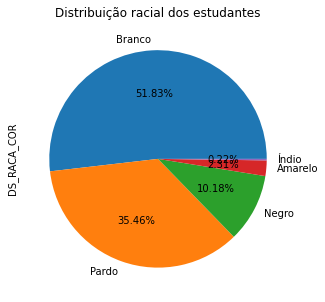

In [ ]:
plot = df11['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df11.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    294804
Banco do Brasil            202307
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

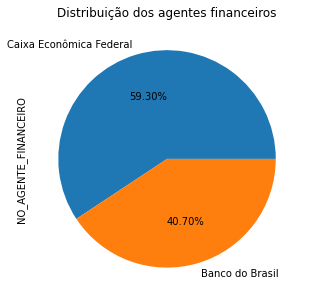

In [ ]:
plot = df11['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df11.DS_ESTADO_CIVIL.value_counts()

Solteiro         390710
Casado            74185
União estável     14573
Divorciado        11309
Separado           5425
Viúvo               909
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

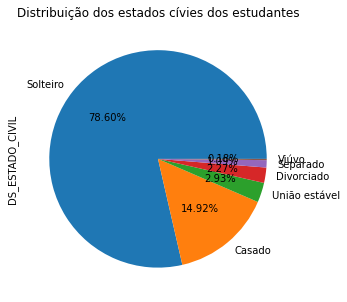

In [ ]:
plot = df11['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df11.DS_PERIODICIDADE_CUR.value_counts()

Semestral     479371
Anual          17484
Trimestral       256
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

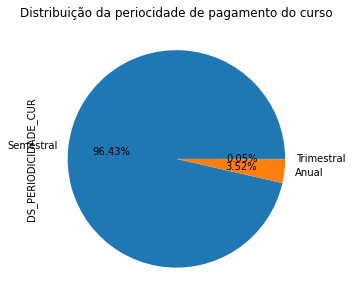

In [ ]:
plot = df11['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df11.NU_ANO_PROC.value_counts()

2012    475741
2013     21370
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df11ComLinhasDuplicads.NU_MES_PROC.value_counts()

11    619466
1     609975
12    604297
10    544712
9     527205
8     265005
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

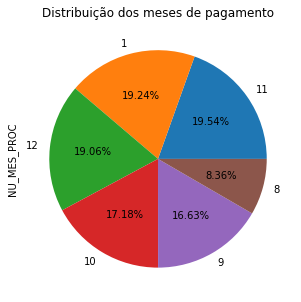

In [ ]:
plot = df11ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df11ComLinhasDuplicads.NU_MES.value_counts()

8     493750
7     493750
9     493749
10    493747
11    492155
12    492153
1      35226
2      35226
5      35226
4      35226
3      35226
6      35226
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

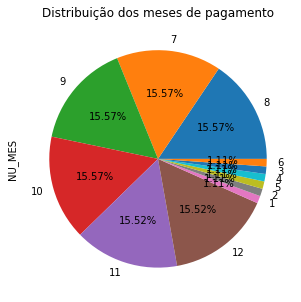

In [ ]:
plot = df11ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df11.NU_SEMESTRE.value_counts()

2    468445
1     28666
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

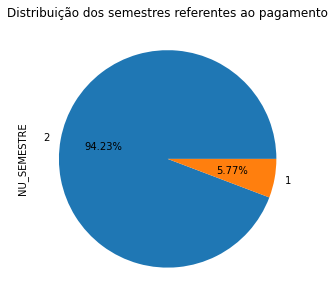

In [ ]:
plot = df11['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df11ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    2959304
1     211356
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

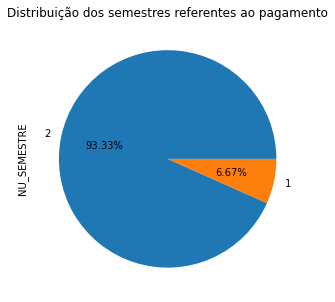

In [ ]:
plot = df11ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df11ComLinhasDuplicads.NU_ANO.value_counts()

2012    3106916
2011      57540
2010       6204
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

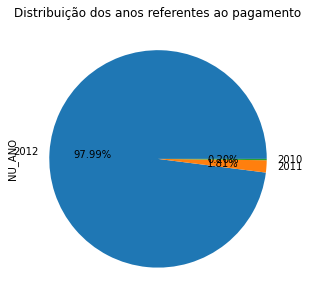

In [ ]:
plot = df11ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df11.TP_FIANCA.value_counts()

N    263786
F    223936
S      9389
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

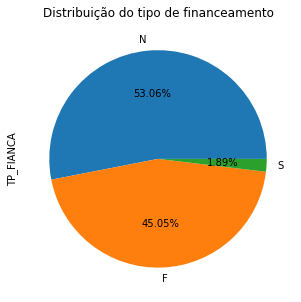

In [ ]:
plot = df11['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df11.DS_TIPO_CURSO.value_counts()

Bacharelado     420858
Licenciatura     45574
Tecnológico      30678
Sequencial           1
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

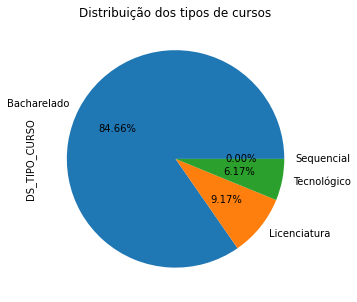

In [ ]:
plot = df11['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df11.CO_PROCESSO.value_counts()

72    179187
71    145309
73     70368
75     51797
76     29080
78     21370
Name: CO_PROCESSO, dtype: int64

In [ ]:
df11.NU_ANO_EXERCICIO_INSC.value_counts()

2012.0    336739
2011.0    114679
2010.0     45691
2013.0         2
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df11.NU_PERCENTUAL_PROUNI.value_counts()

0.0     480020
50.0     17074
25.0        17
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df11.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    360903
50.0      57986
75.0      41028
70.0      11000
80.0       7931
60.0       7615
90.0       3143
65.0       2647
85.0       2524
55.0       1290
95.0       1041
66.0          2
71.0          1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df11.VL_REPASSE.value_counts()

37928.24    224
5549.20     186
41380.66    184
18768.60    177
16580.55    149
           ... 
24638.79      1
23004.84      1
3940.50       1
14510.31      1
45751.86      1
Name: VL_REPASSE, Length: 386044, dtype: int64

In [ ]:
df11.VL_PERC_FINANCIAMENTO.value_counts()

100.0    360903
50.0      57986
75.0      41028
70.0      11000
80.0       7931
60.0       7615
90.0       3143
65.0       2647
85.0       2524
55.0       1290
95.0       1041
66.0          2
71.0          1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df11.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    146626
8.0     115834
6.0      47829
7.0      46000
9.0      43698
4.0      31781
5.0      29122
3.0      13615
12.0      9307
2.0       6864
11.0      5070
1.0       1160
13.0       133
14.0        38
15.0         9
16.0         8
17.0         7
19.0         5
21.0         2
20.0         2
25.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df11.VL_REPASSE.sum()

17539907523.8

In [ ]:
df11.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   5259140150.190
MG   2515221204.570
RS   1207281693.610
RJ   1132396967.620
PR   1054680588.790
BA    957318676.050
MT    780129627.980
CE    691164598.830
SC    532052875.300
GO    481715747.330
PB    400004299.730
DF    360842852.390
PE    335007903.010
ES    323172806.050
PI    244401986.160
RN    190674632.280
PA    156619929.480
SE    138925412.750
AC    130905243.040
RO    120248380.870
MA    118292900.250
AP     88870559.080
MS     83852862.990
AM     75295705.740
TO     70864811.380
AL     62773143.410
RR     28051964.920
Name: VL_REPASSE, dtype: float64

In [ ]:
df11_vl_estados_interativo = df11.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df11_vl_estados_interativo.index,
               y=df11_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df11.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        9229931128.430
NORDESTE       3138563552.470
SUL            2794015157.700
CENTRO-OESTE   1706541090.690
NORTE           670856594.510
Name: VL_REPASSE, dtype: float64

In [ ]:
df11_vl_regiao_interativo = df11.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_vl_regiao_interativo.index,
               y=df11_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df11.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             7229052112.080
Ciências Sociais Aplicadas    4980984965.640
Engenharias                   2907932382.730
Ciências Humanas              1206646502.800
Ciências Agrárias              526995327.560
Ciências Exatas e da Terra     384499218.790
Linguística, Letras e Artes    190169238.580
Ciências Biológicas            113627775.620
Name: VL_REPASSE, dtype: float64

In [ ]:
df11_vl_regiao_interativo = df11.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_vl_regiao_interativo.index,
               y=df11_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df11.VALOR_SEMESTRE_PAGO.sum()

2206163159.5

In [ ]:
df11.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   712229801.540
MG   301501998.900
RJ   147623196.040
RS   135258346.760
PR   128645355.100
BA   119615568.020
MT   102492559.760
CE    81061013.320
SC    61729776.240
GO    58289579.320
DF    46544473.460
PB    45419219.820
PE    44716461.740
ES    36054601.540
PI    27244798.880
RN    23057510.700
PA    18626344.360
AC    16629960.580
SE    16601149.880
MA    15770020.940
RO    13170157.540
MS    12106407.440
AP    11626162.740
AM     9683658.780
TO     8766556.260
AL     7856587.760
RR     3841892.080
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df11_vl_estados_interativo = df11.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df11_vl_estados_interativo.index,
               y=df11_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df11.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        1197409598.020
NORDESTE        381342331.060
SUL             325633478.100
CENTRO-OESTE    219433019.980
NORTE            82344732.340
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df11_vl_regiao_interativo = df11.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_vl_regiao_interativo.index,
               y=df11_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df11.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             816241340.060
Ciências Sociais Aplicadas    685376432.620
Engenharias                   360909621.760
Ciências Humanas              162640090.520
Ciências Exatas e da Terra     66551109.100
Ciências Agrárias              63767171.200
Linguística, Letras e Artes    32503634.660
Ciências Biológicas            18173759.580
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df11_vl_regiao_interativo = df11.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_vl_regiao_interativo.index,
               y=df11_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df11.VALOR_ARQUIVO_PAGO.sum()

2340847815.6400003

In [ ]:
df11.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   761578628.920
MG   318032654.280
RJ   155204313.280
RS   146786535.980
PR   136382741.460
BA   126781473.360
MT   107595817.040
CE    86137721.380
SC    65383794.900
GO    61494269.620
DF    48158941.220
PB    47503460.880
PE    46495956.540
ES    37633916.080
PI    29775485.420
RN    24385176.840
PA    19839590.920
AC    17310459.580
SE    17234160.860
MA    16239454.940
RO    14007821.740
MS    12843077.180
AP    11845010.460
AM    10419596.200
TO     9319206.780
AL     8387393.960
RR     4071155.820
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df11_vl_estados_interativo = df11.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df11_vl_estados_interativo.index,
               y=df11_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df11.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        1272449512.560
NORDESTE        402940284.180
SUL             348553072.340
CENTRO-OESTE    230092105.060
NORTE            86812841.500
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df11_vl_regiao_interativo = df11.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_vl_regiao_interativo.index,
               y=df11_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df11.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             866314402.680
Ciências Sociais Aplicadas    729764063.060
Engenharias                   381648603.240
Ciências Humanas              171572672.600
Ciências Exatas e da Terra     70138408.460
Ciências Agrárias              67759914.100
Linguística, Letras e Artes    34395205.400
Ciências Biológicas            19254546.100
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df11_vl_regiao_interativo = df11.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df11_vl_regiao_interativo.index,
               y=df11_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")